In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df = df.drop(columns =['anaemia','diabetes','high_blood_pressure','sex','smoking','time','DEATH_EVENT'])
print(df) #Вывод датафрейма с данными для лаб. работы. Должно быть 299 наблюдений и 6 признаков

      age  creatinine_phosphokinase  ejection_fraction  platelets  \
0    75.0                       582                 20  265000.00   
1    55.0                      7861                 38  263358.03   
2    65.0                       146                 20  162000.00   
3    50.0                       111                 20  210000.00   
4    65.0                       160                 20  327000.00   
..    ...                       ...                ...        ...   
294  62.0                        61                 38  155000.00   
295  55.0                      1820                 38  270000.00   
296  45.0                      2060                 60  742000.00   
297  45.0                      2413                 38  140000.00   
298  50.0                       196                 45  395000.00   

     serum_creatinine  serum_sodium  
0                 1.9           130  
1                 1.1           136  
2                 1.3           129  
3                 1

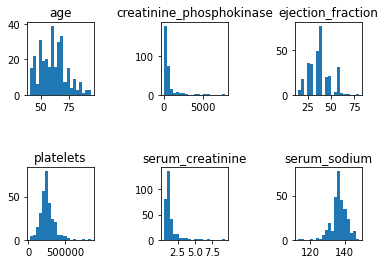

In [2]:
import matplotlib.pyplot as plt
n_bins = 20
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(wspace=1, hspace=1)
axs[0, 0].hist(df['age'].values, bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(df['creatinine_phosphokinase'].values, bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(df['ejection_fraction'].values, bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(df['platelets'].values, bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(df['serum_creatinine'].values, bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(df['serum_sodium'].values, bins = n_bins)
axs[1, 2].set_title('serum_sodium')
plt.show()


In [3]:
data = df.to_numpy(dtype='float')
print(data)

[[7.5000000e+01 5.8200000e+02 2.0000000e+01 2.6500000e+05 1.9000000e+00
  1.3000000e+02]
 [5.5000000e+01 7.8610000e+03 3.8000000e+01 2.6335803e+05 1.1000000e+00
  1.3600000e+02]
 [6.5000000e+01 1.4600000e+02 2.0000000e+01 1.6200000e+05 1.3000000e+00
  1.2900000e+02]
 ...
 [4.5000000e+01 2.0600000e+03 6.0000000e+01 7.4200000e+05 8.0000000e-01
  1.3800000e+02]
 [4.5000000e+01 2.4130000e+03 3.8000000e+01 1.4000000e+05 1.4000000e+00
  1.4000000e+02]
 [5.0000000e+01 1.9600000e+02 4.5000000e+01 3.9500000e+05 1.6000000e+00
  1.3600000e+02]]


In [4]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(data[:150,:])

In [5]:
data_scaled = scaler.transform(data)
print(data_scaled)

[[ 9.68155915e-01 -2.11418177e-02 -1.37635007e+00 -1.81590286e-02
   3.25269804e-01 -1.42156934e+00]
 [-6.38297484e-01  6.09698531e+00  4.09019337e-03 -3.52287805e-02
  -3.60591670e-01 -9.98623091e-02]
 [ 1.64929216e-01 -3.87607463e-01 -1.37635007e+00 -1.08893648e+00
  -1.89126302e-01 -1.64185385e+00]
 ...
 [-1.44152418e+00  1.22114310e+00  1.69129496e+00  4.94068412e+00
  -6.17789723e-01  3.40706702e-01]
 [-1.44152418e+00  1.51784579e+00  4.09019337e-03 -1.31764623e+00
  -1.03393617e-01  7.81275713e-01]
 [-1.03991083e+00 -3.45581586e-01  5.40928073e-01  1.33330766e+00
   6.80717513e-02 -9.98623091e-02]]


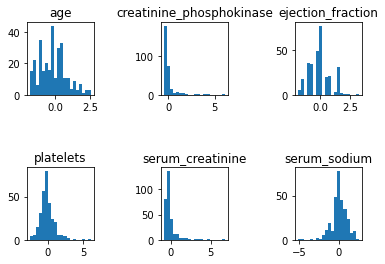

In [6]:
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(wspace=1, hspace=1)
axs[0, 0].hist(data_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
plt.show()

Диапазон значений по x уменьшился, так как мы масштабировали data

In [67]:
#мат. ожидание и СКО
mat_data=np.mean(data, axis=0)
mat_data_scaled=np.mean(data_scaled[:150,:],axis=0)
sko_data=np.std(data)
sko_data_scaled=np.std(data_scaled,axis=0)
print(mat_data)
print(mat_data_scaled)
print(sko_data)
print(sko_data_scaled)
print("-------------------------------------------------------------")
def standardization(name, number):
    r = data_scaled[:,number].max() / data_scaled[:,number].min()
    y = (df[name].max() - r * df[name].min()) / (1 - r)
    x = (df[name].max() - y) / data_scaled[:,number].max()
    print('Формула для', name, ': xi = (xi - ', y, ') / ', x)

standardization('age', 0)
standardization('creatinine_phosphokinase', 1)
standardization('ejection_fraction', 2)
standardization('platelets', 3)
standardization('serum_creatinine', 4)
standardization('serum_sodium', 5)

[6.08338930e+01 5.81839465e+02 3.80836120e+01 2.63358029e+05
 1.39387960e+00 1.36625418e+02]
[ 1.30266168e-16  2.36847579e-17  1.18423789e-16  8.88178420e-17
 -1.30266168e-16 -3.06717614e-15]
105877.9682740705
[0.95382379 0.81417905 0.90610822 1.01506113 0.88542887 0.9703736 ]
-------------------------------------------------------------
Формула для age : xi = (xi -  62.946666666666665 ) /  12.449785361826747
Формула для creatinine_phosphokinase : xi = (xi -  607.1533333333333 ) /  1189.7431752926996
Формула для ejection_fraction : xi = (xi -  37.946666666666665 ) /  13.039318318923817
Формула для platelets : xi = (xi -  266746.74946666666 ) /  96191.79018543586
Формула для serum_creatinine : xi = (xi -  1.5206000000000004 ) /  1.1664162950393542
Формула для serum_sodium : xi = (xi -  136.45333333333335 ) /  4.539583926112858


In [12]:
allscaler = preprocessing.StandardScaler().fit(data)
alldata_scaled = allscaler.transform(data)
sko_alldata_scaled=np.std(alldata_scaled,axis=0)
mat_alldata_scaled=np.mean(alldata_scaled,axis=0)
print(sko_alldata_scaled)
print(sko_data_scaled)
print(mat_alldata_scaled)
print(mat_data_scaled)

[1. 1. 1. 1. 1. 1.]
[0.95382379 0.81417905 0.90610822 1.01506113 0.88542887 0.9703736 ]
[ 5.70335306e-16  0.00000000e+00 -3.26754603e-17  7.72329061e-17
  1.42583827e-16 -8.67384945e-16]
[ 1.30266168e-16  2.36847579e-17  1.18423789e-16  8.88178420e-17
 -1.30266168e-16 -3.06717614e-15]


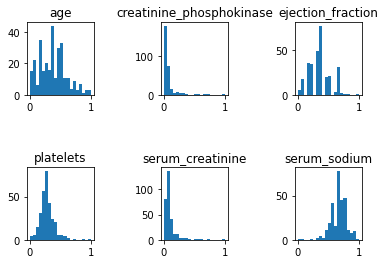

In [66]:
min_max_scaler = preprocessing.MinMaxScaler().fit(data)
data_min_max_scaled = min_max_scaler.transform(data)
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(wspace=1, hspace=1)
axs[0, 0].hist(data_min_max_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_min_max_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_min_max_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_min_max_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_min_max_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_min_max_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
plt.show()

Диапазон значений по х [0;1] стал после стандартизции

In [28]:
min_age=min(data_min_max_scaled[:,0])
min_creatinine_phosphokinase=min(data_min_max_scaled[:,1])
min_ejection_fraction=min(data_min_max_scaled[:,2])
min_platelets=min(data_min_max_scaled[:,3])
min_serum_creatinine=min(data_min_max_scaled[:,4])
min_serum_sodium=min(data_min_max_scaled[:,5])
print("    min    \n""age ",min_age,"\ncreatinine_phosphokinase",min_creatinine_phosphokinase,"\nejection_fraction",min_ejection_fraction,"\nmin_platelets",min_platelets,"\nserum_creatinine",min_serum_creatinine,"\nserum_sodium",min_serum_sodium)
max_age=max(data_min_max_scaled[:,0])
max_creatinine_phosphokinase=max(data_min_max_scaled[:,1])
max_ejection_fraction=max(data_min_max_scaled[:,2])
max_platelets=max(data_min_max_scaled[:,3])
max_serum_creatinine=max(data_min_max_scaled[:,4])
max_serum_sodium=max(data_min_max_scaled[:,5])
print("\n   max  ""\nage ",max_age,"\ncreatinine_phosphokinase",max_creatinine_phosphokinase,"\nejection_fraction",max_ejection_fraction,"\nmin_platelets",max_platelets,"\nserum_creatinine",max_serum_creatinine,"\nserum_sodium",max_serum_sodium)


    min    
age  0.0 
creatinine_phosphokinase 0.0 
ejection_fraction 0.0 
min_platelets 0.0 
serum_creatinine 0.0 
serum_sodium 0.0

   max  
age  1.0 
creatinine_phosphokinase 1.0 
ejection_fraction 1.0 
min_platelets 0.9999999999999999 
serum_creatinine 0.9999999999999999 
serum_sodium 1.0


In [31]:
max_abs_scaler = preprocessing.MaxAbsScaler().fit(data)
data_maxabs = max_abs_scaler.transform(data)

transformer = preprocessing.RobustScaler().fit(data)
data_transformer=transformer.transform(data)

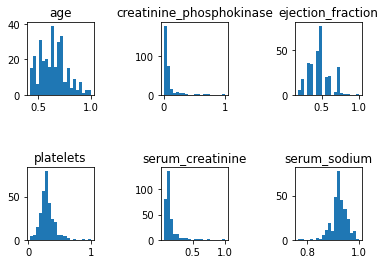

In [32]:
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(wspace=1, hspace=1)
axs[0, 0].hist(data_maxabs[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_maxabs[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_maxabs[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_maxabs[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_maxabs[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_maxabs[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
plt.show()

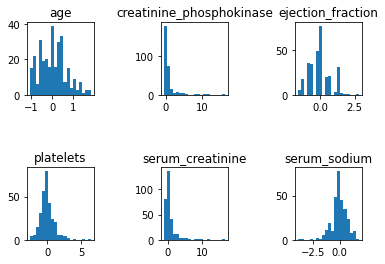

In [33]:
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(wspace=1, hspace=1)
axs[0, 0].hist(data_transformer[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_transformer[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_transformer[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_transformer[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_transformer[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_transformer[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
plt.show()

In [35]:
scaler = preprocessing.MinMaxScaler(feature_range=(-5, 10))
data_scaler=scaler.fit_transform(data)


[[ 4.54545455 -3.93021179 -3.63636364 -0.63765305 -2.64044944  2.28571429]
 [-0.90909091 10.          0.45454545 -0.66751067 -3.98876404  4.85714286]
 [ 1.81818182 -4.76460832 -3.63636364 -2.51060735 -3.65168539  1.85714286]
 ...
 [-3.63636364 -1.1016841   5.45454545  8.03612559 -4.49438202  5.71428571]
 [-3.63636364 -0.42612911  0.45454545 -2.91065584 -3.48314607  6.57142857]
 [-2.27272727 -4.66892064  2.04545455  1.72626985 -3.14606742  4.85714286]]


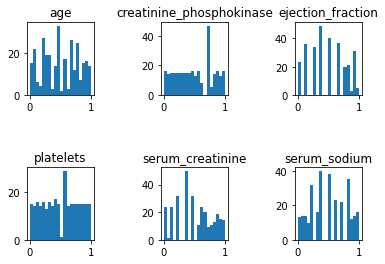

In [41]:
quantile_transformer = preprocessing.QuantileTransformer(n_quantiles = 100,random_state=0).fit(data)
data_quantile_scaled = quantile_transformer.transform(data)
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(wspace=1, hspace=1)
axs[0, 0].hist(data_quantile_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_quantile_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_quantile_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_quantile_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_quantile_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_quantile_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
plt.show()


Изменились значения не только по х, но и по у
n_quantiles - это количество квантилей, подлежащих вычислению. Это соответствует количеству ориентиров, используемых для дискретизации функции кумулятивного распределения

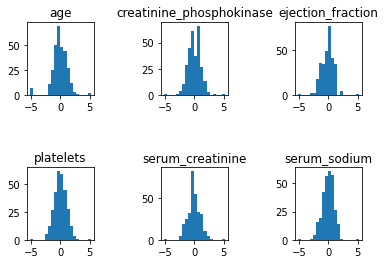

In [46]:
quantile_transformer = preprocessing.QuantileTransformer(n_quantiles = 100, output_distribution='normal',random_state=0).fit(data)
data_quantile_scaled_n = quantile_transformer.transform(data)
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(wspace=1, hspace=1)
axs[0, 0].hist(data_quantile_scaled_n[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_quantile_scaled_n[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_quantile_scaled_n[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_quantile_scaled_n[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_quantile_scaled_n[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_quantile_scaled_n[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
plt.show()

На графиках видно, что все данные сгенерированы в одном диапазоне 


In [48]:
power = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = power.fit_transform(data)

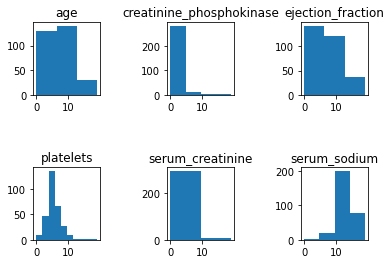

In [62]:
est = preprocessing.KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='uniform').fit(data)
data_kbd = est.transform(data)
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(wspace=1, hspace=1)
axs[0, 0].hist(data_kbd[:,0], bins = 3)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_kbd[:,1], bins = 4)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_kbd[:,2], bins = 3)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_kbd[:,3], bins = 10)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_kbd[:,4], bins = 2)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_kbd[:,5], bins = 4)
axs[1, 2].set_title('serum_sodium')
plt.show()